In [1]:
import os
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
os.listdir(r"colored_images\colored_images")

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [3]:
#check number of images
#join other columns too
train = []
label = []


for i in os.listdir(r"colored_images\colored_images"):
    #iterate through folders in train
    train_class = os.listdir(os.path.join(r"colored_images\colored_images", i))
        
    #iterate through the images in those folder
    for j in train_class:
        img = os.path.join(r"colored_images\colored_images", i,j)
        train.append(img)
        label.append(i)
        
print('Number of train images = {}'.format(len(train)))

Number of train images = 35126


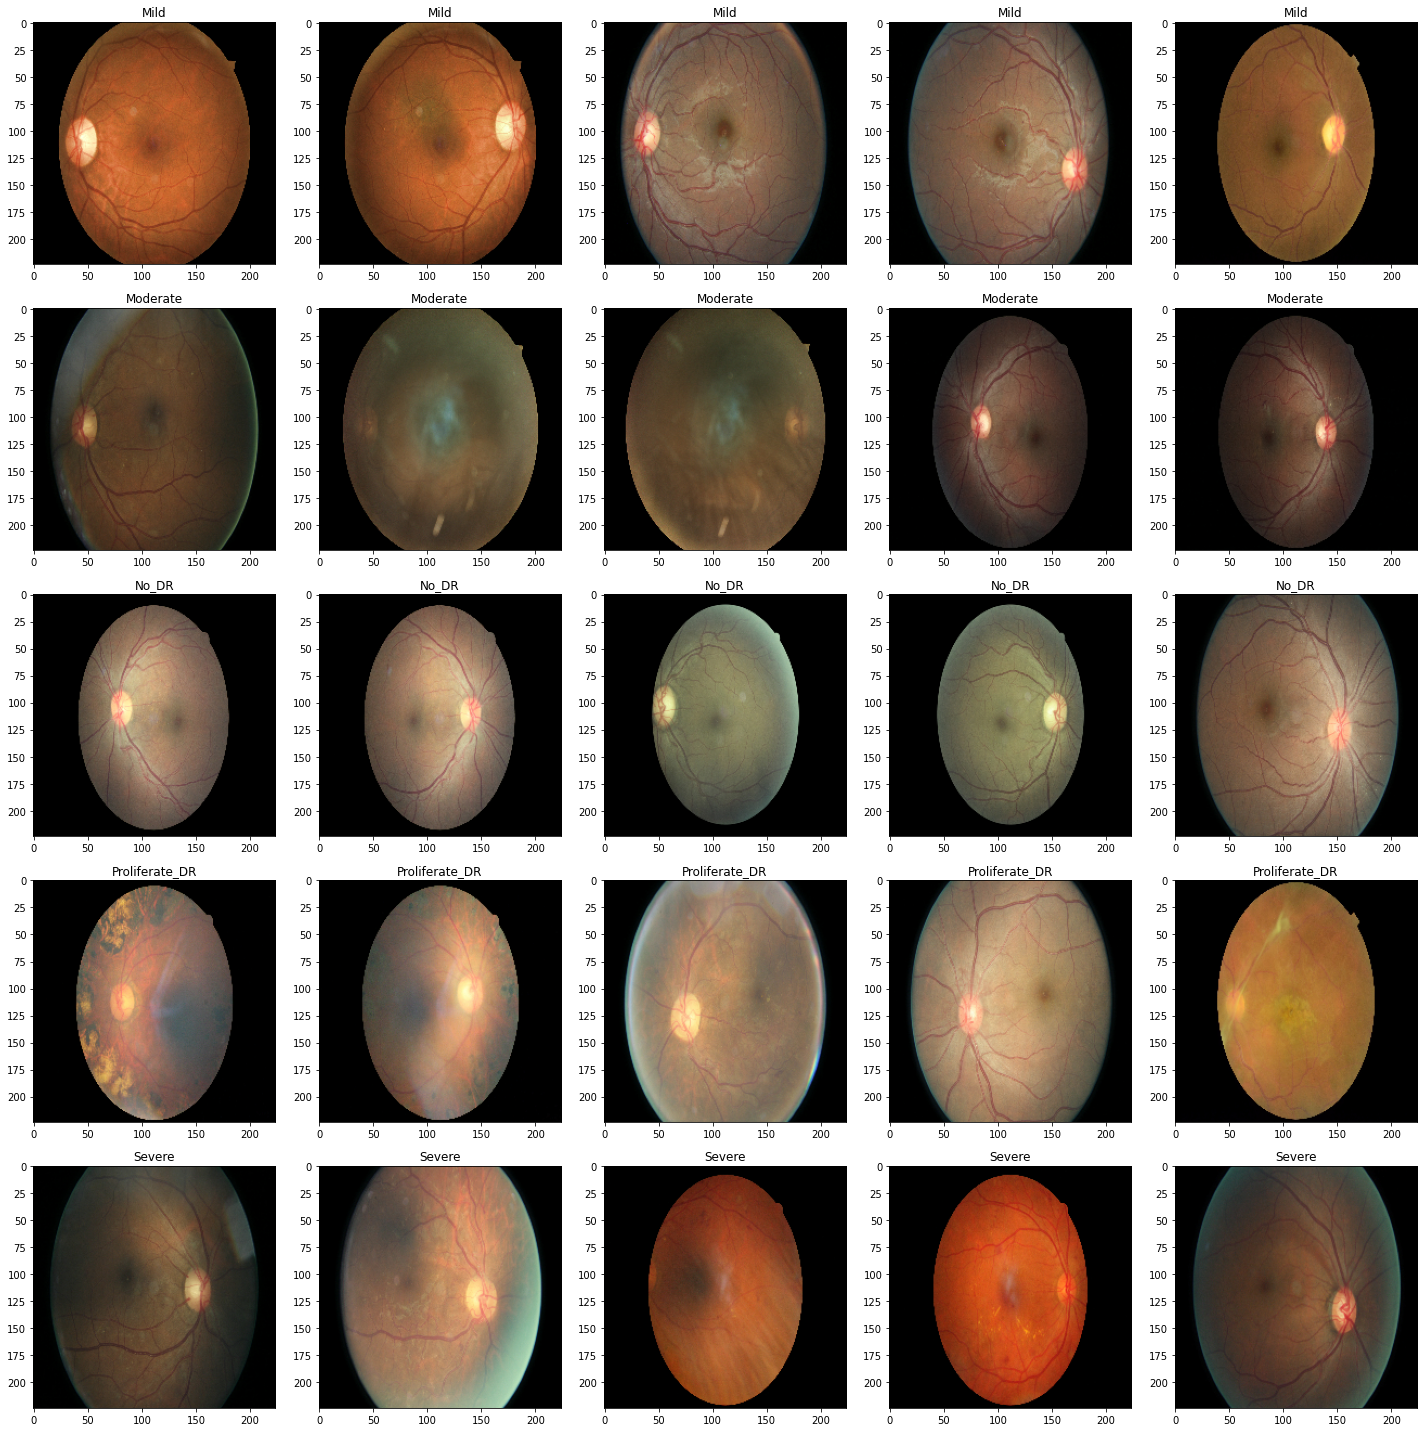

In [4]:
#visualise 5 images of each class

fig, axs = plt.subplots(5,5, figsize=(20,20)) #5 images , 5 class
count = 0

for i in os.listdir(r"colored_images\colored_images"):
    train_class = os.listdir(os.path.join(r"colored_images\colored_images",i))

    for j in range(5):
        img = os.path.join(r"colored_images\colored_images",i,train_class[j])
        img = PIL.Image.open(img)
        axs[count][j].title.set_text(i) #getting class label of that image
        axs[count][j].imshow(img)
    count+=1;
    
fig.tight_layout()

C:\python-3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

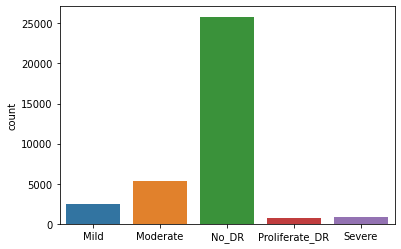

In [5]:
sns.countplot(label)

In [22]:
No_images_per_class = []
Class_name = []

for i in os.listdir(r"colored_images\colored_images"):
    train_class = os.listdir(os.path.join(r"colored_images\colored_images", i))
    No_images_per_class.append(len(train_class))
    Class_name.append(i)
    print('Number of images in {}={}\n'.format(i, len(train_class)))

Number of images in Mild=2443

Number of images in Moderate=5292

Number of images in No_DR=25810

Number of images in Proliferate_DR=708

Number of images in Severe=873



In [7]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [40]:
def duplicateImage(subdirectory, n):
    path = os.listdir(os.path.join(r"colored_images\colored_images", subdirectory))
    
    for j in path:
        p = os.path.join(r"colored_images\colored_images", subdirectory, j)
        img = tf.keras.utils.load_img(p)
        x = tf.keras.utils.img_to_array(img)
        x = x.reshape((1,)+x.shape)
        
        i = 0;
        for batch in datagen.flow(x, batch_size=1, save_to_dir='Severe', save_prefix='retina', save_format='png'):
            i += 1
            if i > n:
                break;
        

In [41]:
duplicateImage('Severe', 10)

In [47]:
print(len(os.listdir(r"dataset/No_DR")))

6732


In [28]:
print(len(os.listdir(r"colored_images\colored_images\Moderate")))

6237
